# air_store_info の概要把握

## 主な特徴

- 


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [30]:
# データの読み込み
# 文字コードはUTF-8(BOMなし)
raw_air_store_info = pd.read_csv('../data/air_store_info.csv', engine='python', encoding='UTF-8')

## テーブルのサイズ、要素の確認

データセットの概要

- 829行、5列

| column | air_store_id | air_genre_name | air_area_name | latitude | longitude |
| :----- | ------------ | -------------- | ------------- | -------- | --------- |
| 意味   | airの店ID    | ジャンル       | 地名          | 緯度     | 経度      |
| 型     | object       | object         | object        | float    | float     |
| 欠損   | なし         | なし           | なし          | なし     | なし      |

In [31]:
# 列と行
raw_air_store_info.shape

(829, 5)

In [32]:
# 型を確認
raw_air_store_info.dtypes

air_store_id       object
air_genre_name     object
air_area_name      object
latitude          float64
longitude         float64
dtype: object

In [33]:
# 欠損の確認
raw_air_store_info.isnull().any(axis=0)

air_store_id      False
air_genre_name    False
air_area_name     False
latitude          False
longitude         False
dtype: bool

In [34]:
raw_air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [35]:
# ランダムに行を表示
raw_air_store_info.sample(n=10, random_state=0)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
103,air_35c4732dcbfe31be,Dining bar,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
8,air_0919d54f0c9a24b8,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
258,air_ad13e71e21235131,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813
627,air_7a81bd7fadcbf3d8,Bar/Cocktail,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
356,air_a41b032371a63427,Cafe/Sweets,Fukuoka-ken Itoshima-shi Maebarunishi,33.557320,130.195555
294,air_b30fffd7ab1e75a5,Cafe/Sweets,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
656,air_3b6438b125086430,Bar/Cocktail,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
520,air_4433ab8e9999915f,Izakaya,Miyagi-ken Sendai-shi Kamisugi,38.269076,140.870403
316,air_add9a575623726c8,Cafe/Sweets,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059


In [36]:
# object型の概要
raw_air_store_info.describe(include='O')

,air_store_id,air_genre_name,air_area_name
count,829,829,829
unique,829,14,103
top,air_a218912784bf767d,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō
freq,1,197,64


In [37]:
# 数値型の概要
raw_air_store_info.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


## air_store_id (airの店ID)


### 特徴
  - 重複IDなし


In [38]:
raw_air_store_info['air_store_id'].duplicated().any(axis=0)

False

## air_genre_name (airでの店のジャンル)

### 特徴

- ジャンルは14種類
- Izakya が最も多く、ほとんど出現しないジャンルも複数ある。
- **hpgとはジャンルの分け方が異なる**

In [39]:
# ジャンル数を確認
raw_air_store_info['air_genre_name'].unique().size

14

In [40]:
air_genre_name_dist = raw_air_store_info['air_genre_name'].value_counts()

In [41]:
# 出現回数を表示
print('head_5')
print(air_genre_name_dist.head())
print()
print('tail_5')
print(air_genre_name_dist.tail())

head_5
Izakaya           197
Cafe/Sweets       181
Dining bar        108
Italian/French    102
Bar/Cocktail       79
Name: air_genre_name, dtype: int64

tail_5
Okonomiyaki/Monja/Teppanyaki    14
Creative cuisine                13
International cuisine            2
Karaoke/Party                    2
Asian                            2
Name: air_genre_name, dtype: int64


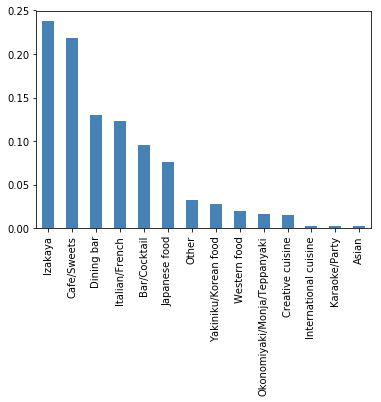

In [42]:
# 比率をプロット
(air_genre_name_dist/len(raw_air_store_info)).plot.bar(color='steelblue')

## air_area_name (airでの店の地名)

### 特徴

- データ内の地名の数は103箇所
- 欠損はない
- 9県のデータ。東京が半分以上

In [43]:
# 地名の数を確認
raw_air_store_info['air_area_name'].unique().size

103

In [44]:
air_area_name_dist = raw_air_store_info['air_area_name'].value_counts()

In [45]:
# 出現回数を表示
print('head_5')
print(air_area_name_dist.head())
print()
print('tail_5')
print(air_area_name_dist.tail())

head_5
Fukuoka-ken Fukuoka-shi Daimyō    64
Tōkyō-to Shibuya-ku Shibuya       58
Tōkyō-to Minato-ku Shibakōen      51
Tōkyō-to Shinjuku-ku Kabukichō    39
Tōkyō-to Setagaya-ku Setagaya     30
Name: air_area_name, dtype: int64

tail_5
Hyōgo-ken Kōbe-shi Motomachidōri       2
Niigata-ken Kashiwazaki-shi Chūōchō    2
Tōkyō-to Chiyoda-ku Kanda Jinbōchō     2
Tōkyō-to Katsushika-ku Tateishi        2
Tōkyō-to Toshima-ku Nishiikebukuro     2
Name: air_area_name, dtype: int64


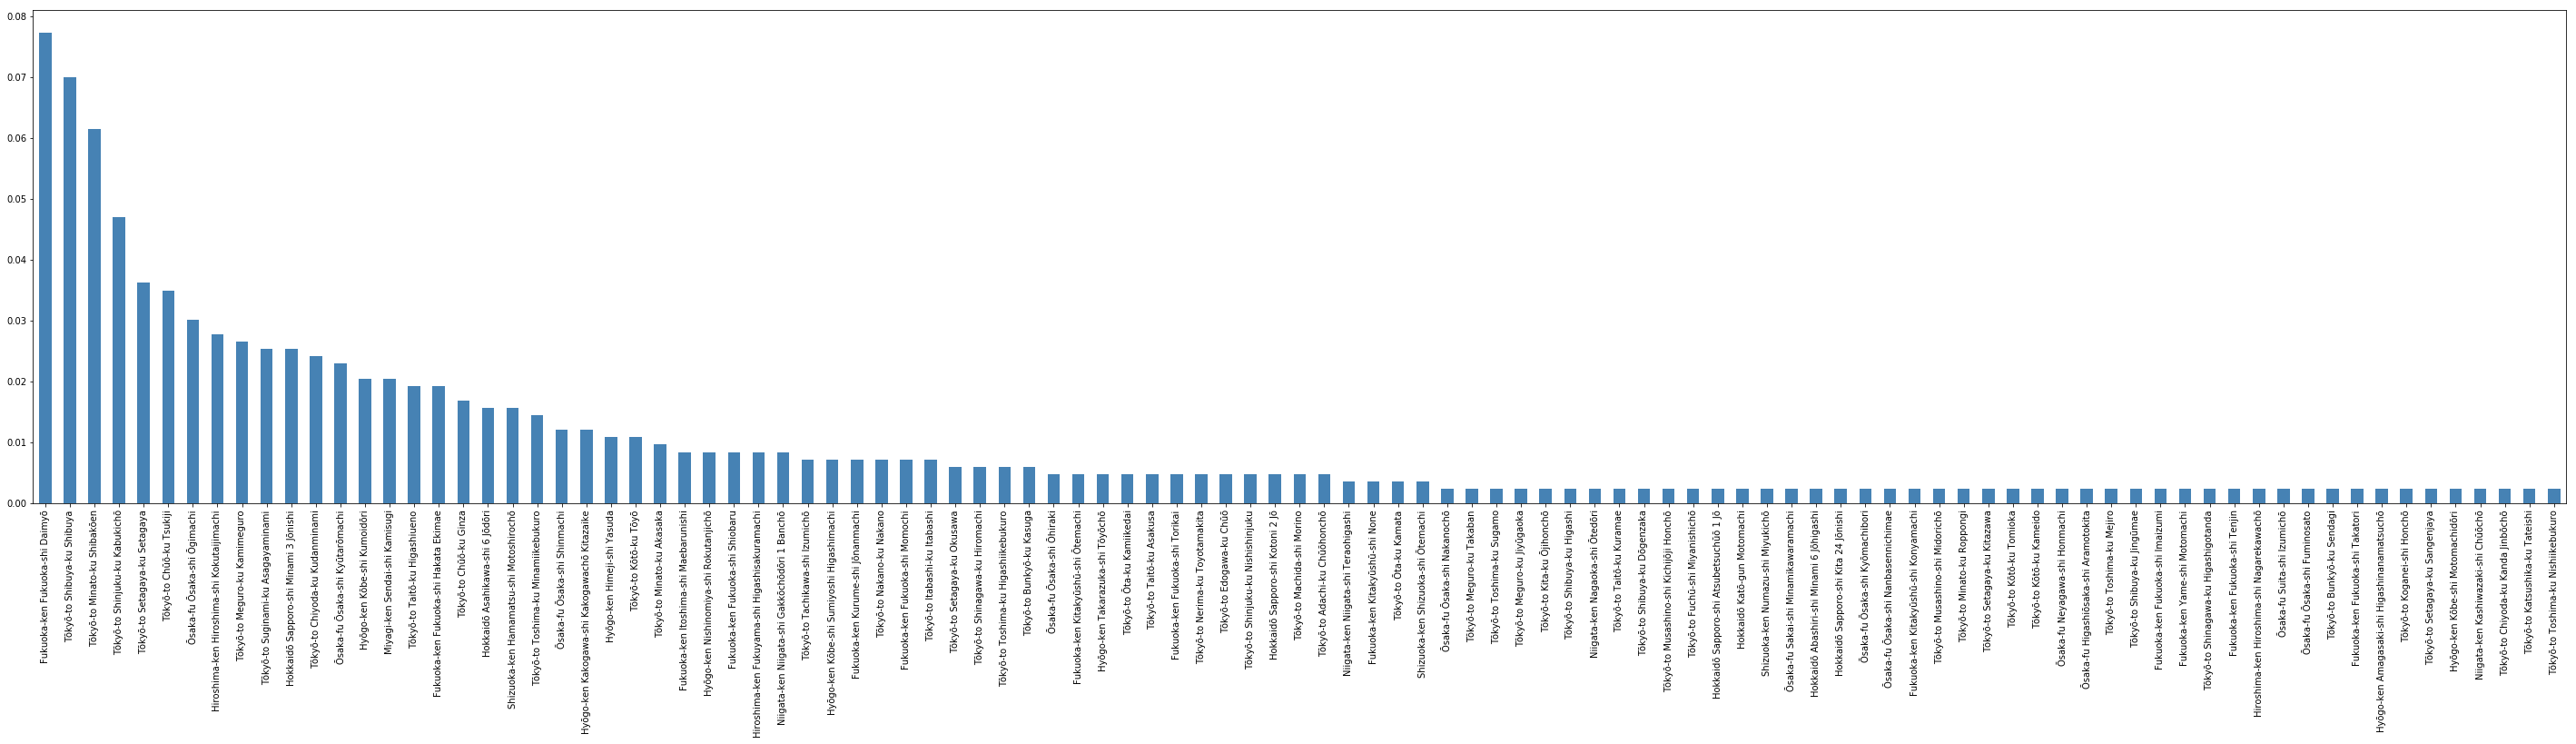

In [46]:
# 比率をプロット
(air_area_name_dist/len(raw_air_store_info)).plot.bar(color='steelblue',figsize=(50,10))


### 県名レベルでの集計

In [48]:
air_pref_name = raw_air_store_info['air_area_name'].apply(lambda x:x.split(' ')[0])

In [49]:
# 県の数
air_pref_name.unique().size

9

In [50]:
air_pref_name_dist = air_pref_name.value_counts()

In [51]:
# 出現回数を表示
air_pref_name_dist

Tōkyō-to         444
Fukuoka-ken      127
Ōsaka-fu          74
Hyōgo-ken         57
Hokkaidō          46
Hiroshima-ken     32
Shizuoka-ken      18
Miyagi-ken        17
Niigata-ken       14
Name: air_area_name, dtype: int64

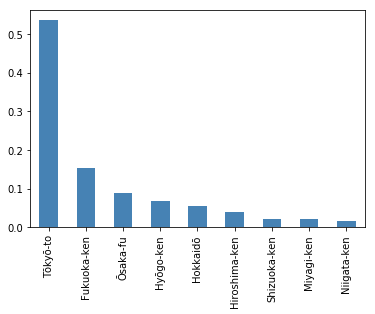

In [52]:
# 比率をプロット
(air_pref_name_dist/len(raw_air_store_info)).plot.bar(color='steelblue')


## latitude, longitude 

### 特徴

- 北海道から福岡まで全国の主要都市からのデータ

In [53]:
# 再掲
# 数値型の概要
raw_air_store_info.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


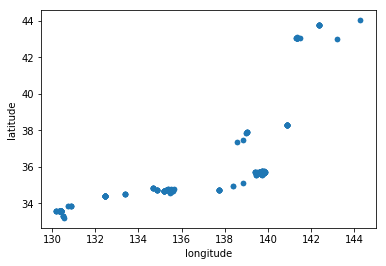

In [54]:
raw_air_store_info.plot.scatter(x='longitude', y='latitude')

### 東西南北の最端地点

In [55]:
# 最北
raw_air_store_info.sort_values(by='longitude').tail(1)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
229,air_1653a6c513865af3,Yakiniku/Korean food,Hokkaidō Abashiri-shi Minami 6 Jōhigashi,44.020632,144.273398


In [56]:
# 最南
raw_air_store_info.sort_values(by='longitude').head(1)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
357,air_68d075113f368946,Cafe/Sweets,Fukuoka-ken Itoshima-shi Maebarunishi,33.55732,130.195555


In [57]:
# 最東端
raw_air_store_info.sort_values(by='latitude').tail(1)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
230,air_dfad598ff642dab7,Yakiniku/Korean food,Hokkaidō Abashiri-shi Minami 6 Jōhigashi,44.020632,144.273398


In [58]:
# 最西
raw_air_store_info.sort_values(by='latitude').head(1)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
761,air_b2dcec37b83e2494,Japanese food,Fukuoka-ken Yame-shi Motomachi,33.211967,130.557908


### ジャンルと地名の相関

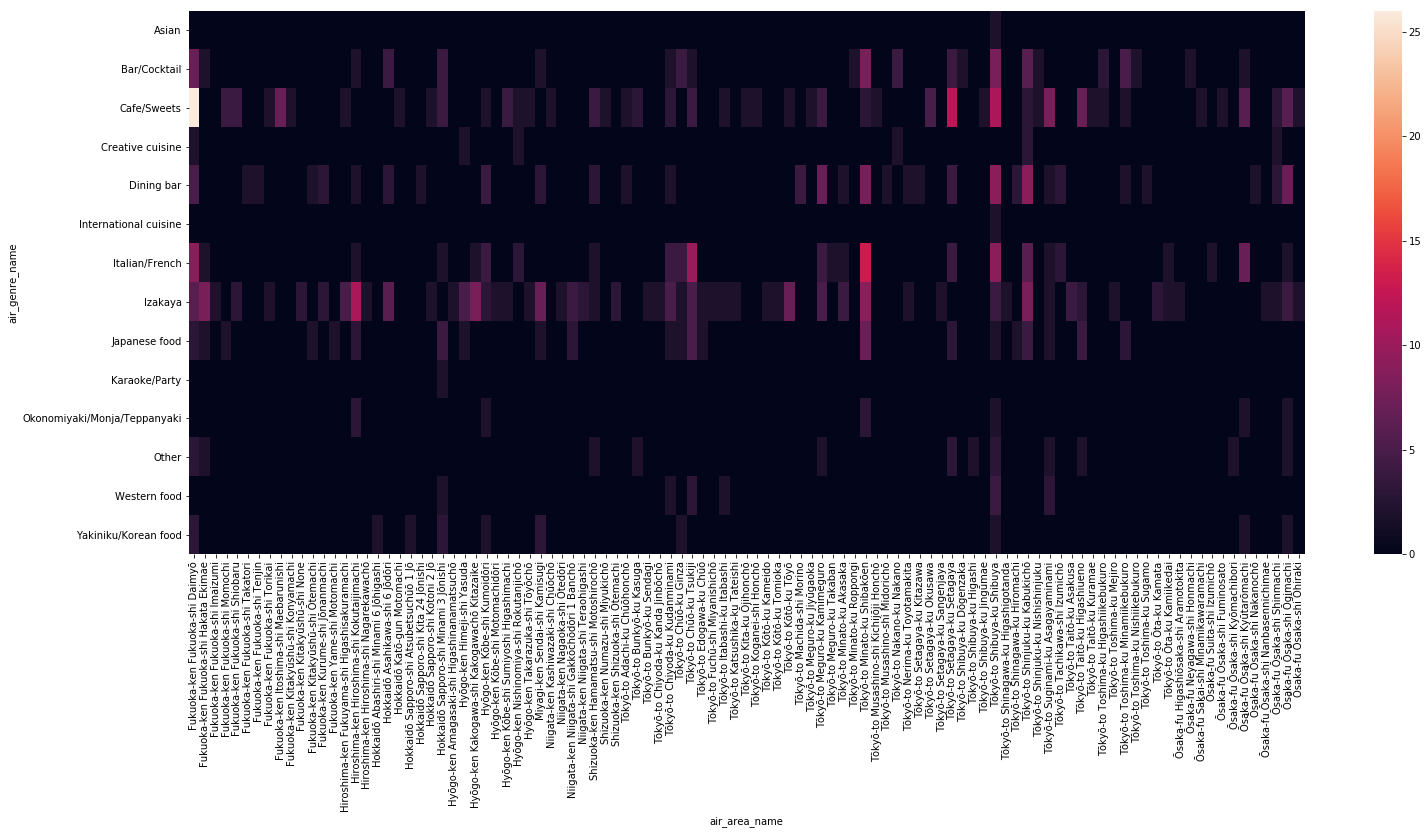

In [59]:
# ジャンルと地名でピボットテーブル作成
air_genre_area_pivot = raw_air_store_info.pivot_table(values='air_store_id', index='air_genre_name', columns='air_area_name', aggfunc=lambda x: x.value_counts().count())
# NaNに0を代入
air_genre_area_pivot[air_genre_area_pivot.isnull()] = 0
# ヒートマップを出力
plt.subplots(figsize=(25,10))
sns.heatmap(air_genre_area_pivot)

#### 県ごとに見てみる

In [60]:
raw_air_store_info_pref = pd.concat([raw_air_store_info, air_pref_name], axis=1)

In [61]:
raw_air_store_info_pref.columns = ['air_store_id', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude', 'air_fref_name']

In [62]:
raw_air_store_info_pref.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,air_fref_name
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to


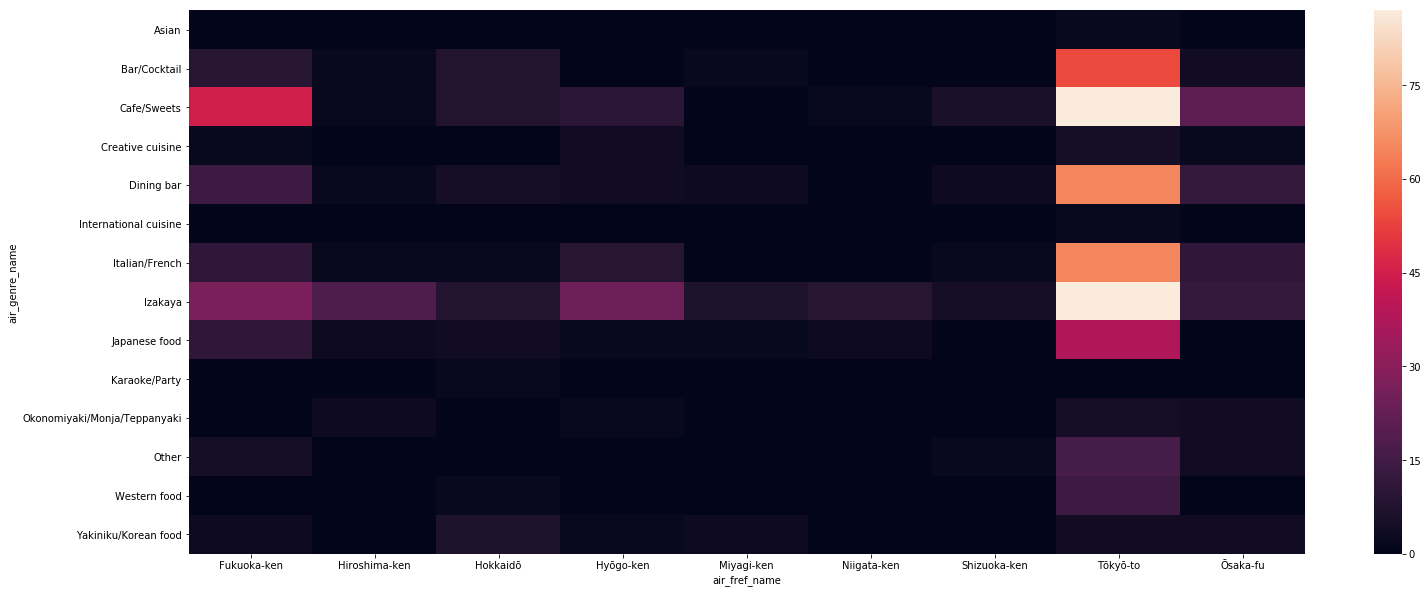

In [63]:
# ジャンルと地名でピボットテーブル作成
air_genre_area_pivot = raw_air_store_info_pref.pivot_table(values='air_store_id', index='air_genre_name', columns='air_fref_name', aggfunc=lambda x: x.value_counts().count())
# NaNに0を代入
air_genre_area_pivot[air_genre_area_pivot.isnull()] = 0
# ヒートマップを出力
plt.subplots(figsize=(25,10))
sns.heatmap(air_genre_area_pivot)

## 緯度経度は地域名で一意に決まるの（同じ地名だと緯度経度はすべて同じ）

In [66]:
raw_air_store_info.query('air_area_name == "Tōkyō-to Shibuya-ku Shibuya"').describe()

,latitude,longitude
count,5.800000e+01,5.800000e+01
mean,3.566178e+01,1.397041e+02
std,7.167485e-15,2.866994e-14
min,3.566178e+01,1.397041e+02
25%,3.566178e+01,1.397041e+02
50%,3.566178e+01,1.397041e+02
75%,3.566178e+01,1.397041e+02
max,3.566178e+01,1.397041e+02


#### 検証方法
1. area_name で group by 
2. それぞれのグループでlatitudeの分散を計算する
3. 分散が０ならグループのなかで値はすべて同じ

In [65]:
raw_air_store_info.groupby('air_area_name')['latitude'].var()

air_area_name
Fukuoka-ken Fukuoka-shi Daimyō                   1.518274e-07
Fukuoka-ken Fukuoka-shi Hakata Ekimae            0.000000e+00
Fukuoka-ken Fukuoka-shi Imaizumi                 0.000000e+00
Fukuoka-ken Fukuoka-shi Momochi                  0.000000e+00
Fukuoka-ken Fukuoka-shi Shiobaru                 0.000000e+00
Fukuoka-ken Fukuoka-shi Takatori                 0.000000e+00
Fukuoka-ken Fukuoka-shi Tenjin                   0.000000e+00
Fukuoka-ken Fukuoka-shi Torikai                  0.000000e+00
Fukuoka-ken Itoshima-shi Maebarunishi            0.000000e+00
Fukuoka-ken Kitakyūshū-shi Konyamachi            0.000000e+00
Fukuoka-ken Kitakyūshū-shi None                  0.000000e+00
Fukuoka-ken Kitakyūshū-shi Ōtemachi              0.000000e+00
Fukuoka-ken Kurume-shi Jōnanmachi                0.000000e+00
Fukuoka-ken Yame-shi Motomachi                   0.000000e+00
Hiroshima-ken Fukuyama-shi Higashisakuramachi    0.000000e+00
Hiroshima-ken Hiroshima-shi Kokutaijimachi       0.00000